<img src = images/hello.jpg width = '2000' height = '3700' >

In [1]:
!ls

Dan_exploratory.ipynb       images
README.md                   main-project-notebook.ipynb
data


## Data Preparation

### Importing Libraries

In [2]:
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
import statsmodels.api as sm
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from statsmodels.formula.api import ols
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from imblearn.over_sampling import SMOTE 
from folium.plugins import FastMarkerCluster
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,\
RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss,\
classification_report, plot_confusion_matrix, roc_curve, auc


### Data Exploration

In [3]:
df = pd.read_csv('data/churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.isna().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [9]:
# Fixing the column names
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [10]:
# Data observation: -
# We have a total of 3,333 rows and 21 columns.
# No missing data.
# The total number of customers who churned in our data is 483.
# Churn is imbalance. 

### Data Cleaning

In [11]:
# Copying the to a new variable called df_cleaned.
df_cleaned = df.copy()
df_cleaned.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
# Changing churn type from bool to int 0 and 1
# 1 is for True and 0 is False
df_cleaned['churn'] = df_cleaned['churn'].astype(int)
df_cleaned['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [13]:
# Dropping any unnecessary or identifiers column that we don't need.
# Like state, phone_number, and area_code.
df_cleaned = df_cleaned.drop(columns=['state','phone_number', 'area_code'], axis=1)

#### Feature Engineering

In [14]:
# Adding a total charge per bill cycle column. This column will show how a customer pays per bill cycle.
total_bill_charge = df_cleaned.apply(lambda x: x['total_day_charge'] + x['total_eve_charge'] + x['total_night_charge']
                             + x['total_intl_charge'], axis=1)

df_cleaned['total_bill_charge'] = total_bill_charge

In [15]:
# Slicing object type features
cont_features = [col for col in df_cleaned.columns if df_cleaned[col].dtype in [np.float64, np.int64]]
feature_df = df_cleaned.loc[:, cont_features]
feature_df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_bill_charge
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


In [16]:
# Adding a total charge per bill cycle column. This column will show how a customer pays per bill cycle.
total_bill_charge = df_cleaned.apply(lambda x: x['total_day_charge'] + x['total_eve_charge'] + x['total_night_charge']
                             + x['total_intl_charge'], axis=1)

df_cleaned['total_bill_charge'] = total_bill_charge

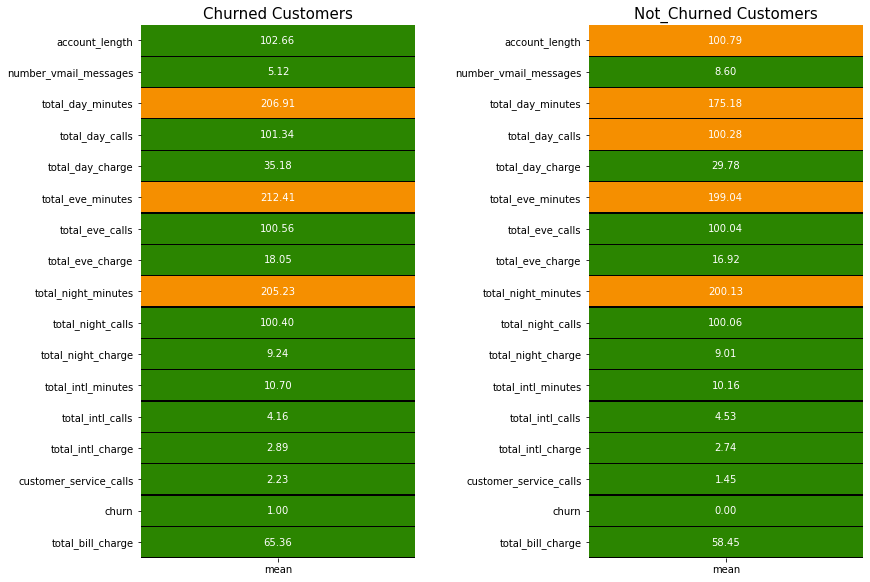

In [17]:
colors = ['#2b8500','#f58f00']

churn = df_cleaned[df_cleaned['churn'] == 1].describe().T
not_churn = df_cleaned[df_cleaned['churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (13,9))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.2,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers', size = 15);


plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.2,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers', size = 15);

fig.tight_layout(pad = 4)

In [18]:
# The table displace the mean values for customers who churned and customers who did not churn.

/Users/benitofoxx/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


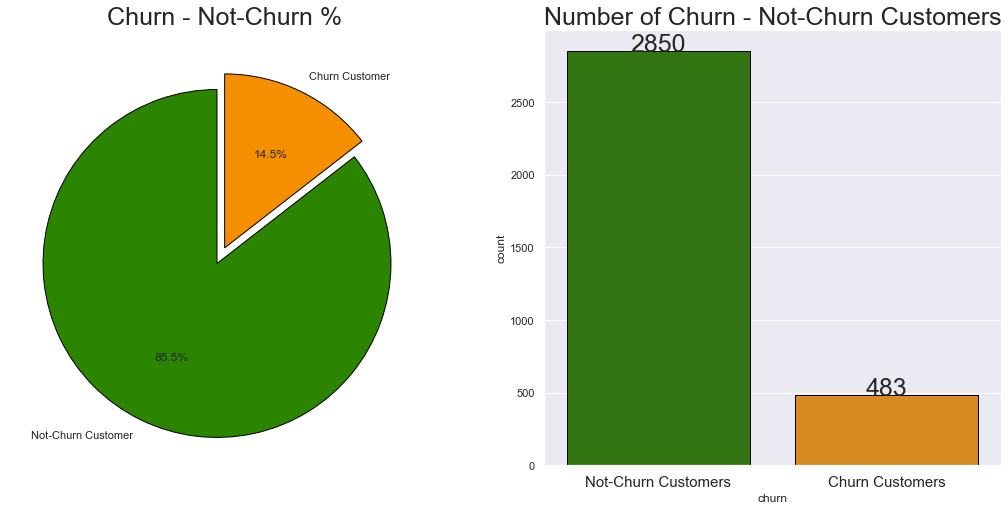

In [127]:
# Plotting a pie chart to get the percenatage of churned customers and not churned customers.

l = list(df_cleaned['churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (18,8))
plt.subplot(1,2,1)
plt.pie(circle, labels = ['Not-Churn Customer','Churn Customer'], autopct = '%1.1f%%', startangle = 90, explode = (0.1,0), colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %', size = 25)

# Ploting a bar chart to get the total numbers of churned and not churned customers
plt.subplot(1,2,2)
ax = sns.countplot('churn',data = df_cleaned ,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment = 'center', fontsize = 25)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'], fontsize = 15)
plt.title('Number of Churn - Not-Churn Customers', size = 25);
plt.show()

In [20]:
# From our charts above we have 14.5% of customers who churned and 85.5 did not churn from the data provided.
# And in our bar chart the total number of customer who churned is 483 and not churned is 2850.
# This also tells us that our data is imabalance and our predictions will be biased.

In [21]:
# Separating Numerical columns from Categorical columns.
cols = list(df_cleaned.columns)
categorical_columns = []
numerical_columns = []
for data in cols:
    if len(df_cleaned[data].unique()) > 2:
        numerical_columns.append(data)
    else:
        categorical_columns.append(data)

print('Categorical Columns:',*categorical_columns)
print('''''')
print('Numerical Columns:',*numerical_columns)

Categorical Columns: international_plan voice_mail_plan churn

Numerical Columns: account_length number_vmail_messages total_day_minutes total_day_calls total_day_charge total_eve_minutes total_eve_calls total_eve_charge total_night_minutes total_night_calls total_night_charge total_intl_minutes total_intl_calls total_intl_charge customer_service_calls total_bill_charge


In [22]:
# Removing the target (churn) from categorical columns for more EDA. 
categorical_columns.remove('churn')
categorical_columns

['international_plan', 'voice_mail_plan']

/Users/benitofoxx/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/benitofoxx/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


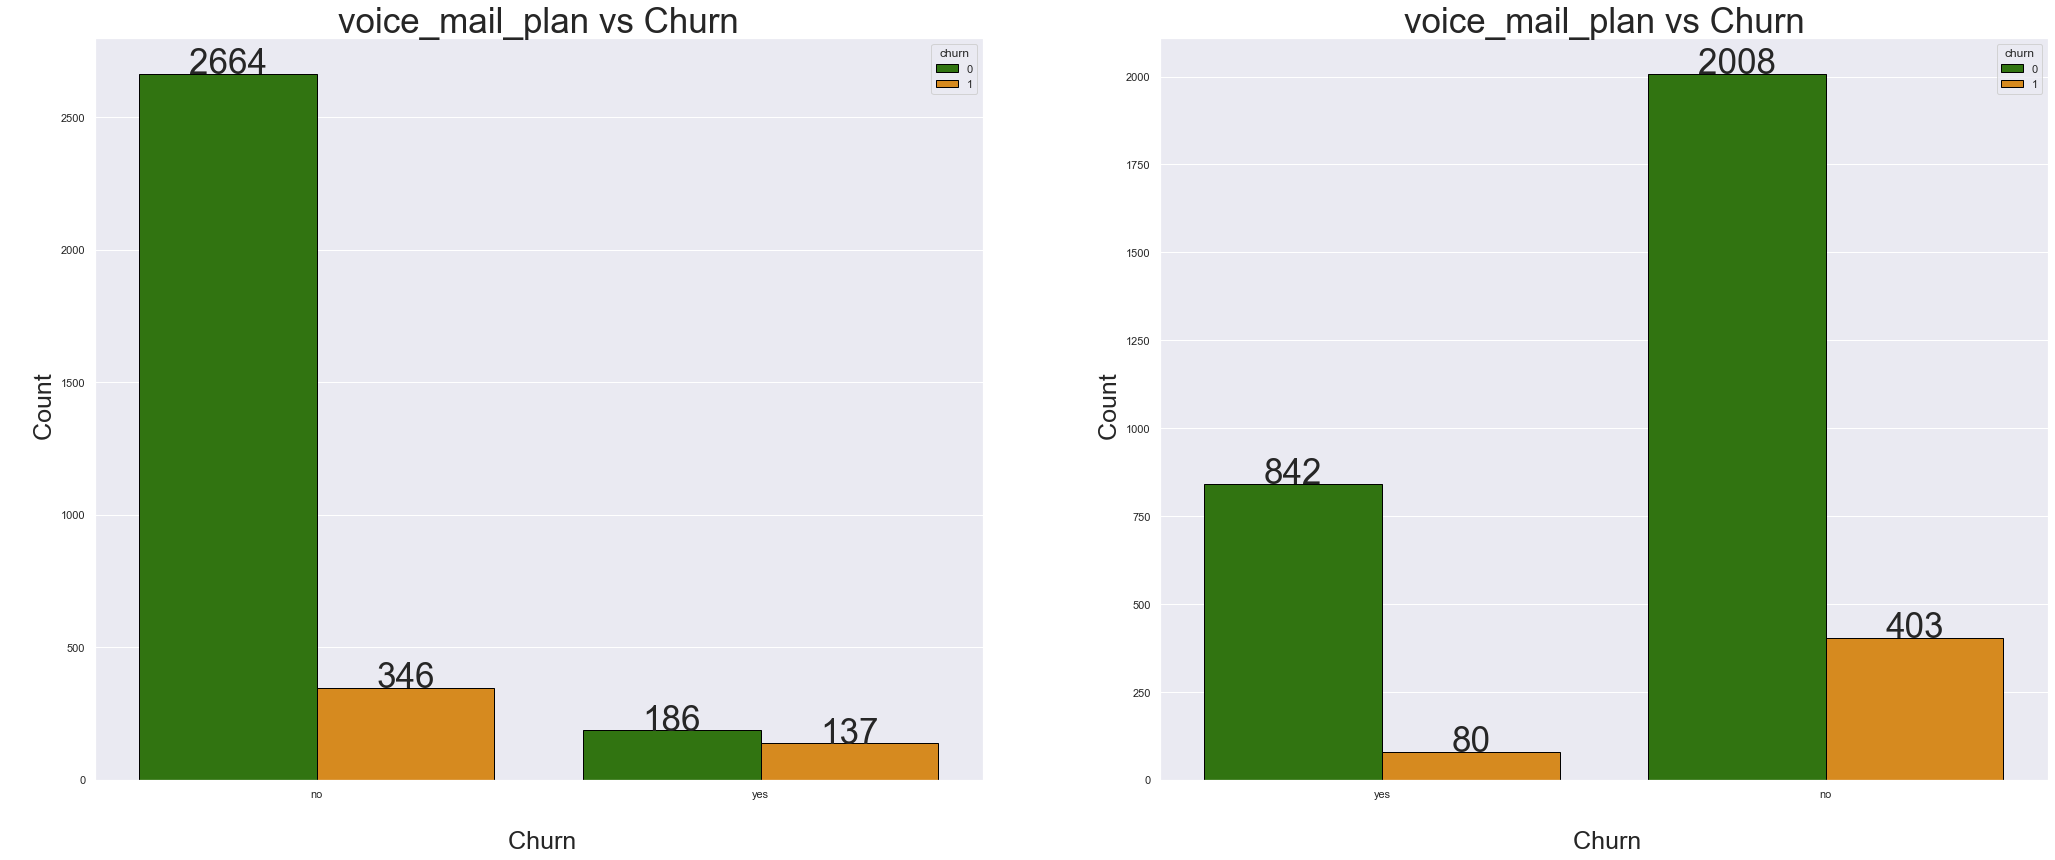

In [123]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (35,30))
for data in range(len(categorical_columns)):
    plt.subplot(2,2, data + 1)
    ax = sns.countplot(categorical_columns[data],data = df_cleaned, hue = "churn", palette = colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment = 'center', fontsize = 35)
    ax.set_ylabel('\n Count',fontsize = 25)
    ax.set_xlabel('\n Churn',fontsize = 25)
    plt.title(title, size = 35);

In [24]:
# Out of 2664 of customer who doesn't have internal plan 346 churned.
# Out of 186 customer who have international plan 137 churned.
# Out of 2008 customer who doen't have voicemail plan 403 churned.
# Out of 842 customer who have voicemail plan 80 churned.

In [25]:
df_cleaned2 = df_cleaned.copy()
df_cleaned2.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_bill_charge
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


In [26]:
# OneHotEncoding
ohe_cols = df_cleaned2[['international_plan', 'voice_mail_plan', 'customer_service_calls']]
ohe = OneHotEncoder()
ohe.fit(ohe_cols)

ohe_1 = ohe.transform(ohe_cols).toarray()

ohe_df = pd.DataFrame(ohe_1, columns=ohe.get_feature_names(ohe_cols.columns))
ohe_df.head()

,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,customer_service_calls_0,customer_service_calls_1,customer_service_calls_2,customer_service_calls_3,customer_service_calls_4,customer_service_calls_5,customer_service_calls_6,customer_service_calls_7,customer_service_calls_8,customer_service_calls_9
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Combining all the cleaned data
df_cleaned3 = pd.concat([pd.DataFrame(feature_df), ohe_df], axis=1)
df_cleaned3.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,customer_service_calls_0,customer_service_calls_1,customer_service_calls_2,customer_service_calls_3,customer_service_calls_4,customer_service_calls_5,customer_service_calls_6,customer_service_calls_7,customer_service_calls_8,customer_service_calls_9
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Dropping some of the redundant values.
df_cleaned4 = df_cleaned3.copy()
df_cleaned4 = df_cleaned4.drop(['international_plan_no', 'voice_mail_plan_no'], axis=1)

In [29]:
# Creating a new variable for high customer service calls.
# 4 or more calls is high and anything under that is low.
cs_calls_high = df_cleaned4.apply(lambda x: x['customer_service_calls_4'] + x['customer_service_calls_5']
                              + x['customer_service_calls_6'] + x['customer_service_calls_7']
                            + x['customer_service_calls_8']+ x['customer_service_calls_9'], axis=1)

df_cleaned4['cs_calls_high'] = cs_calls_high

In [30]:
# Dropping redundant variables
df_cleaned4 = df_cleaned4.drop(['customer_service_calls_0', 'customer_service_calls_1','customer_service_calls_2','customer_service_calls_3',
                     'customer_service_calls_4','customer_service_calls_5','customer_service_calls_6',
                     'customer_service_calls_7','customer_service_calls_8','customer_service_calls_9']
                    , axis=1)
df_cleaned4.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_bill_charge,international_plan_yes,voice_mail_plan_yes,cs_calls_high
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56,0.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24,0.0,1.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80,1.0,0.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09,1.0,0.0,0.0


#### Preparing Model Data

In [31]:
model_df = df_cleaned4.copy()

In [32]:
# Dropping all columns that we might not need for modeling.
model_df = model_df.drop(['customer_service_calls','total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
                          , axis=1)

In [33]:
model_df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,churn,total_bill_charge,international_plan_yes,voice_mail_plan_yes,cs_calls_high
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,0,75.56,0.0,1.0,0.0
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,0,59.24,0.0,1.0,0.0
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,62.29,0.0,0.0,0.0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,0,66.80,1.0,0.0,0.0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,0,52.09,1.0,0.0,0.0


### Modeling 

In [34]:
# Function to get metrics of second models.
def get_metrics(clf, y_pred):
    
    clf_acc = accuracy_score(y_test, y_pred) * 100
    print('Accuracy is :{0}'.format(clf_acc))
    clf_rcl = recall_score(y_test, y_pred) * 100
    print('Recall is :{0}'.format(clf_rcl))
    clf_prcn = precision_score(y_test, y_pred) * 100
    print('Precision is :{0}'.format(clf_prcn))
    clf_f1 = f1_score(y_test, y_pred) * 100
    print('F1 Score is :{0}'.format(clf_f1))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    clf_roc_auc = auc(false_positive_rate, true_positive_rate)
    print('ROC AUC is :{0}'.format(round(clf_roc_auc, 2)))

In [35]:
# Dealing imbalance data using SMOTE
sm = SMOTE(sampling_strategy = 'auto')

# Defining my target
X = model_df.drop('churn', axis = 1)
y = model_df['churn']

# Fitting X and y variables to a SMOTE resample
X, y = sm.fit_resample(X, y)
Counter(y)

Counter({0: 2850, 1: 2850})

In [36]:
# Splitting my data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 25, stratify = y)

In [37]:
# Function to get the validation score Roc curve score of a model.
def model(classifier,X_train, y_train, X_test, y_test):
    
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 1,random_state = 25)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier, X_train, y_train, cv = cv, scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    plot_roc_curve(classifier, X_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

# Model Evaluation.
def model_evaluation(classifier,X_test, y_test):
    
# Confusion Matrix the model.
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fig, ax = plt.subplots(figsize=(12,9))
    ax = sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    ax.set_xlabel('\nPredicted Values',fontsize = 20)
    ax.set_ylabel('Actual Values ', fontsize=20)
    ax.xaxis.set_ticklabels(['Stayed','Churned'])
    ax.yaxis.set_ticklabels(['Stayed','Churned'])
    
# Classification Report
    print(classification_report(y_test, classifier.predict(X_test)))

#### First Model Decision Tree A

In [38]:
dt1 = DecisionTreeClassifier(random_state = 25, max_depth = 2, min_samples_leaf = 1)

Cross Validation Score :  86.63%
ROC_AUC Score :  86.84%


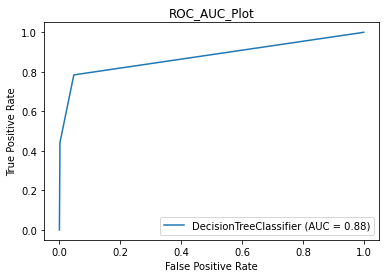

In [39]:
model(dt1, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       570
           1       0.94      0.78      0.86       570

    accuracy                           0.87      1140
   macro avg       0.88      0.87      0.87      1140
weighted avg       0.88      0.87      0.87      1140



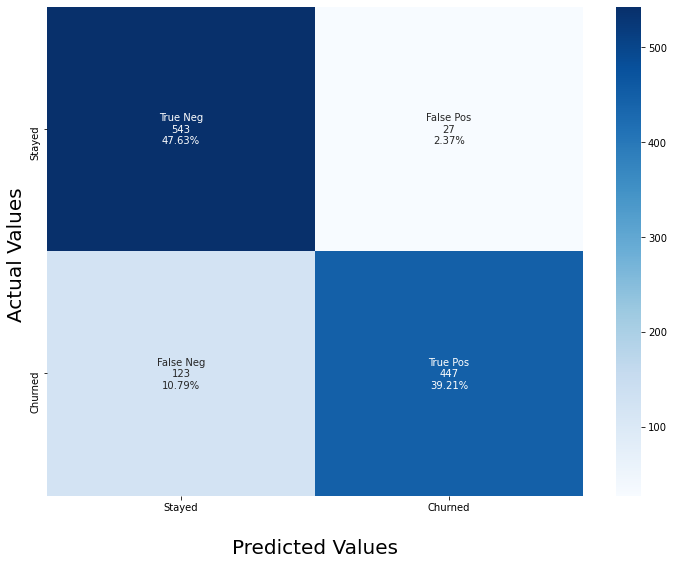

In [40]:
model_evaluation(dt1, X_test, y_test)

#### First Model Decision Tree B Using Grid Search

In [41]:
# Defining the grid
dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [42]:
dt2 = DecisionTreeClassifier(random_state = 20)

dt2_grid_search = GridSearchCV(dt2, dt_grid, cv = 4, scoring = 'recall')

# Fiting the data.
dt2_grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [43]:
dt2_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [44]:
dt2_pred = DecisionTreeClassifier(criterion = 'gini', max_depth = None, min_samples_split = 5,
                             min_samples_leaf = 1, random_state = 23)
dt2_pred.fit(X_train, y_train)
dt2_y_pred = dt2_pred.predict(X_test)

In [45]:
get_metrics(dt2, dt2_y_pred)

Accuracy is :94.73684210526315
Recall is :96.49122807017544
Precision is :93.22033898305084
F1 Score is :94.82758620689654
ROC AUC is :0.95


In [46]:
dt2_cv_score = np.mean(cross_val_score(dt2, X_train, y_train, cv = 2))
dt2_cv_score

0.9383771929824561

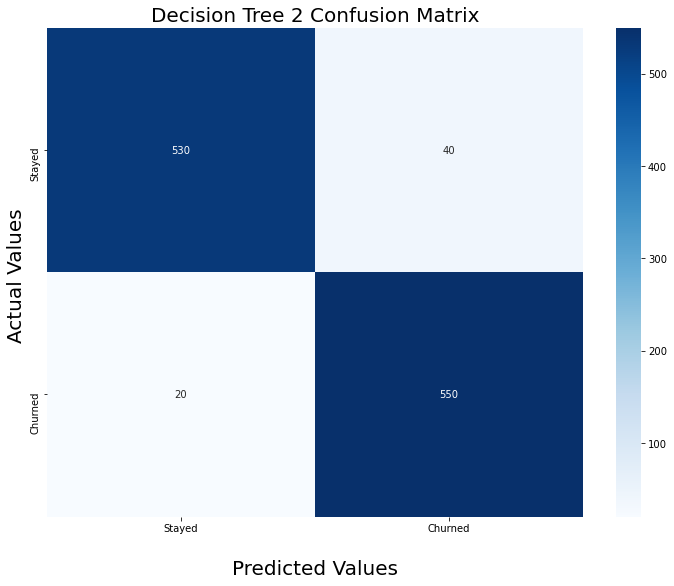

In [47]:
dt2_matrix = confusion_matrix(y_test, dt2_y_pred)

fig, ax = plt.subplots(figsize=(12,9))

ax = sns.heatmap(dt2_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('Decision Tree 2 Confusion Matrix', fontsize = 20);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Stayed','Churned'])
ax.yaxis.set_ticklabels(['Stayed','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Second Model Random Forest A

In [48]:
rf1 = RandomForestClassifier(max_depth = 4, random_state = 23)

Cross Validation Score :  97.24%
ROC_AUC Score :  94.56%


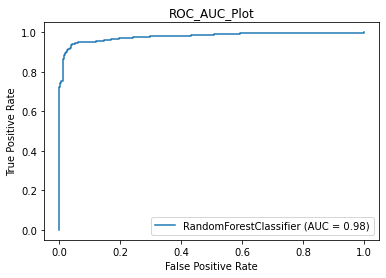

In [49]:
model(rf1, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       570
           1       0.95      0.94      0.95       570

    accuracy                           0.95      1140
   macro avg       0.95      0.95      0.95      1140
weighted avg       0.95      0.95      0.95      1140



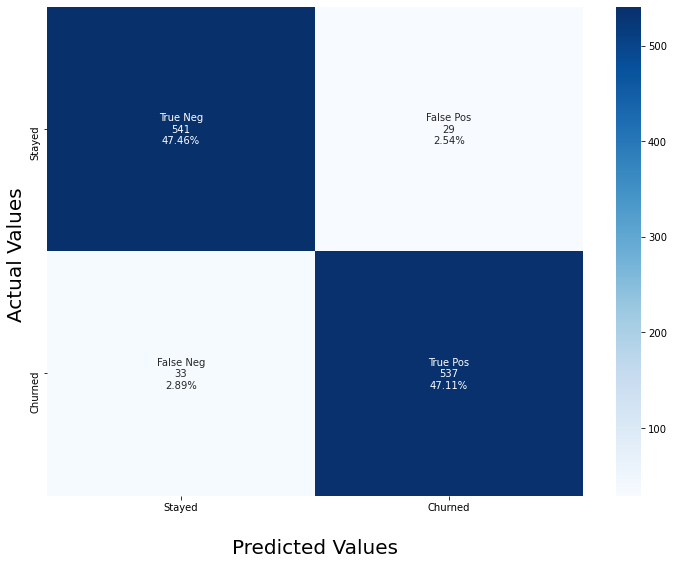

In [50]:
model_evaluation(rf1, X_test, y_test)

#### Second Model Random Forest B Using Grid Search

In [51]:
rf_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [52]:
rf2 = RandomForestClassifier(random_state = 42)

In [53]:
rf2_grid_search = GridSearchCV(estimator = rf2, param_grid = rf_grid, cv = 2)

In [54]:
rf2_grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [55]:
rf2_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [56]:
rf2_pred = RandomForestClassifier(criterion = 'entropy', max_depth = 8, max_features = 'auto',
                             n_estimators = 200)
rf2_pred.fit(X_train, y_train)
rf2_y_pred = rf2_pred.predict(X_test)

In [57]:
get_metrics(rf2_pred, rf2_y_pred)

Accuracy is :96.49122807017544
Recall is :94.73684210526315
Precision is :98.18181818181819
F1 Score is :96.42857142857142
ROC AUC is :0.96


In [58]:
rf2_cv_score = np.mean(cross_val_score(rf2, X_train, y_train, cv = 3))
rf2_cv_score

0.9719298245614034

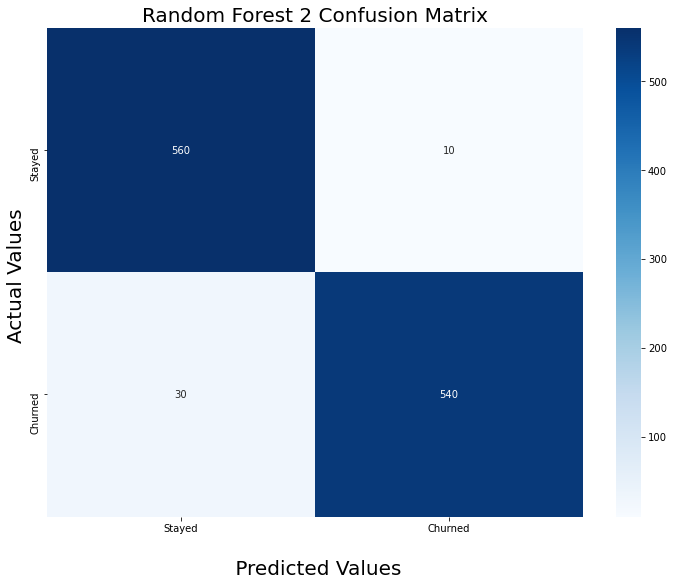

In [59]:
rf2_matrix = confusion_matrix(y_test, rf2_y_pred)

fig, ax = plt.subplots(figsize=(12,9))

ax = sns.heatmap(rf2_matrix, annot = True, cmap = 'Blues', fmt = 'd')

ax.set_title('Random Forest 2 Confusion Matrix', fontsize = 20);
ax.set_xlabel('\n Predicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Stayed','Churned'])
ax.yaxis.set_ticklabels(['Stayed','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [60]:
# The second Random Forest model so far looks better than all the models.

#### Third Model XGBoost

In [61]:
xgb1 = xgboost.XGBClassifier(learning_rate= 0.01, max_depth = 3, n_estimators = 100)

Cross Validation Score :  95.44%
ROC_AUC Score :  93.16%


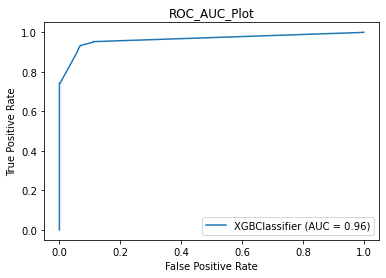

In [62]:
model(xgb1, X_train, y_train, X_test,y_test)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       570
           1       0.93      0.93      0.93       570

    accuracy                           0.93      1140
   macro avg       0.93      0.93      0.93      1140
weighted avg       0.93      0.93      0.93      1140



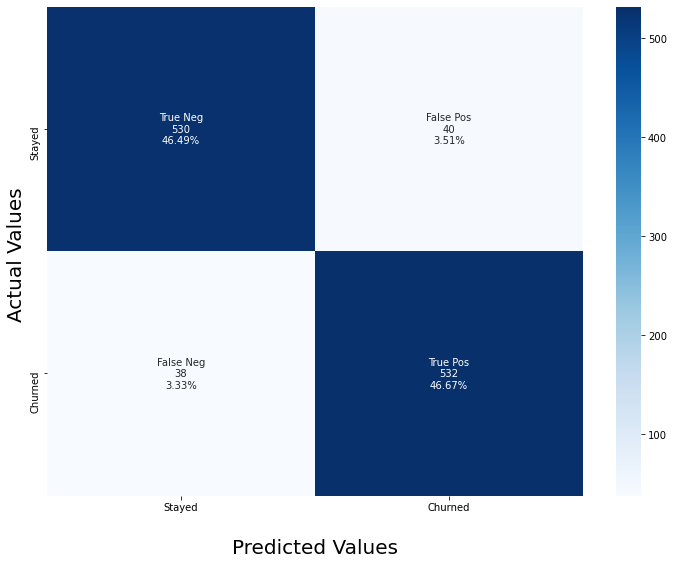

In [63]:
model_evaluation(xgb1, X_test, y_test)

In [64]:
xgb_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [65]:
xgb2 = xgboost.XGBClassifier(random_state = 23)

grid_clf = GridSearchCV(xgb2, xgb_grid, scoring = 'recall', cv = 4, n_jobs = 2)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7


In [66]:
xgb2 = xgboost.XGBClassifier(learning_rate = 0.2, max_depth = 6, min_child_weight = 1,
                                n_estimators = 100, subsample = 0.7, random_state = 42)
xgb2.fit(X_train, y_train)
xgb2_y_pred = xgb2.predict(X_test)

In [67]:
get_metrics(xgb2, xgb2_y_pred)

Accuracy is :98.15789473684211
Recall is :96.49122807017544
Precision is :99.8185117967332
F1 Score is :98.12667261373772
ROC AUC is :0.98


In [68]:
xgb2_cv_score = np.mean(cross_val_score(xgb2, X_train, y_train, cv = 3))
xgb2_cv_score

0.9739035087719299

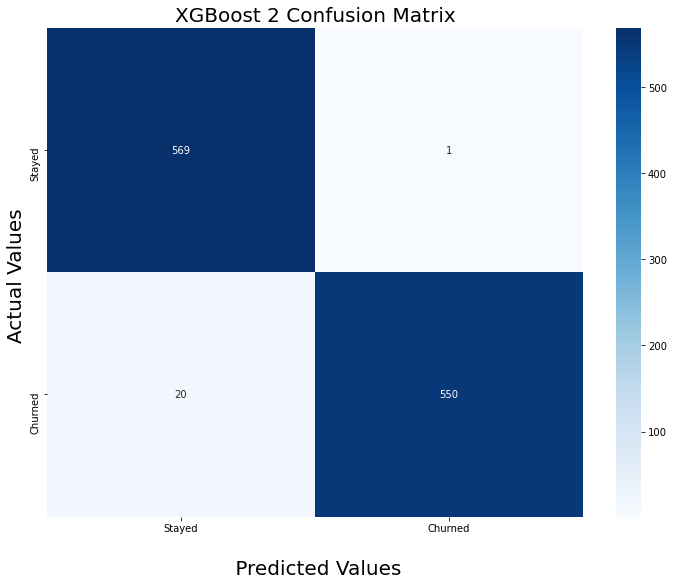

In [69]:
xgb2_matrix = confusion_matrix(y_test, xgb2_y_pred)

fig, ax = plt.subplots(figsize=(12,9))

ax = sns.heatmap(xgb2_matrix, annot = True, cmap = 'Blues', fmt = 'd')

ax.set_title('XGBoost 2 Confusion Matrix', fontsize = 20);
ax.set_xlabel('\n Predicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Stayed','Churned'])
ax.yaxis.set_ticklabels(['Stayed','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [70]:
# Final model prediction using Stack Classifier
stack = StackingClassifier(estimators = [('xgb1',xgb1),
                                         ('xgb2',xgb1),
                                         ('rf1',rf1),
                                         ('rf2', rf2),
                                         ('dt1',dt1),
                                         ('dt2', dt2 )],
                           final_estimator = xgb2)

Cross Validation Score :  98.62%
ROC_AUC Score :  97.89%


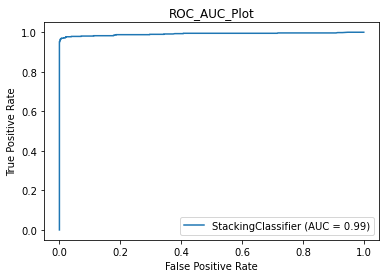

In [71]:
model(stack, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       570
           1       0.99      0.97      0.98       570

    accuracy                           0.98      1140
   macro avg       0.98      0.98      0.98      1140
weighted avg       0.98      0.98      0.98      1140



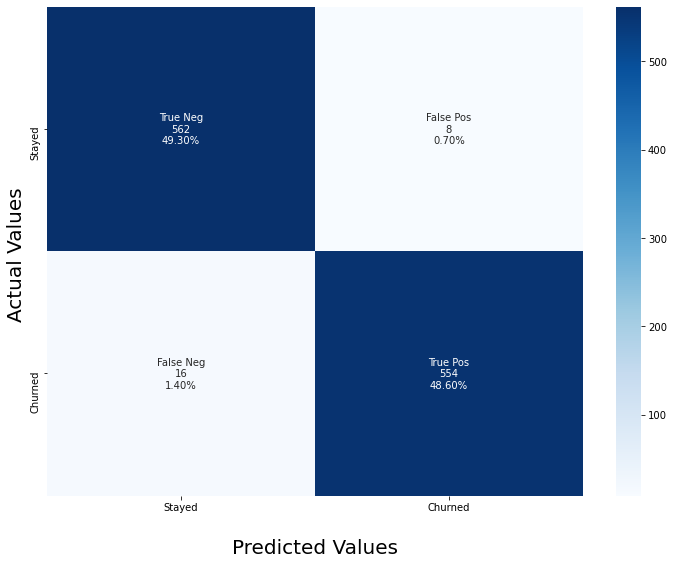

In [72]:
model_evaluation(stack, X_test, y_test)

In [73]:
# We used the stacking classifier above to get the final estimator for the final prediction.

#### Feature Importance

In [74]:
feature_importance_names = list(X)
feature_importance_names

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_eve_minutes',
 'total_eve_calls',
 'total_night_minutes',
 'total_night_calls',
 'total_intl_minutes',
 'total_intl_calls',
 'total_bill_charge',
 'international_plan_yes',
 'voice_mail_plan_yes',
 'cs_calls_high']

In [75]:
xgb1_importance = xgb2.feature_importances_
xgb1_importance

array([0.01326949, 0.01859517, 0.01614367, 0.01394711, 0.01528021,
       0.01168985, 0.01545527, 0.01432218, 0.02494283, 0.03975213,
       0.11854441, 0.15934183, 0.10636133, 0.43235454], dtype=float32)

In [76]:
feature_importance_df = pd.DataFrame(xgb1_importance, feature_importance_names)
feature_importance_df= feature_importance_df.reset_index()
feature_importance_df.rename(columns={'index': 'Feature', 0: 'Importance'}, inplace=True)
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df

,Feature,Importance
13,cs_calls_high,0.432355
11,international_plan_yes,0.159342
10,total_bill_charge,0.118544
12,voice_mail_plan_yes,0.106361
9,total_intl_calls,0.039752
8,total_intl_minutes,0.024943
1,number_vmail_messages,0.018595
2,total_day_minutes,0.016144
6,total_night_minutes,0.015455
4,total_eve_minutes,0.015280


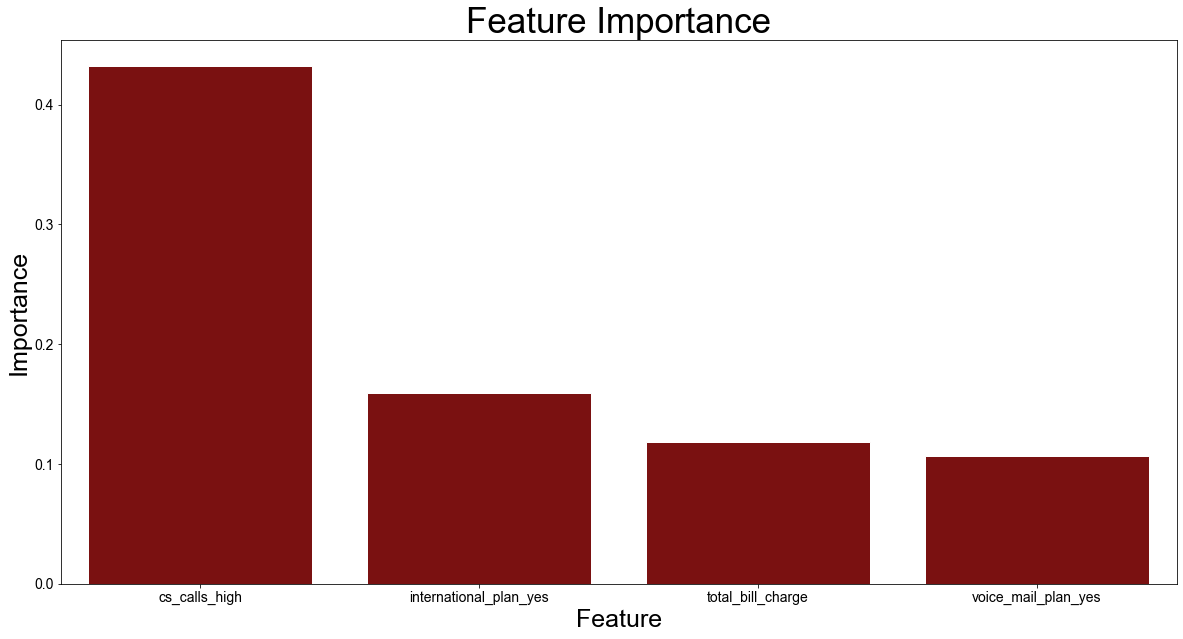

In [77]:
# Feature Importance Chart.
fig, ax = plt.subplots(figsize = (20, 10))
sns.set(style = 'whitegrid')

p = sns.barplot(x = "Feature", y = 'Importance', data = feature_importance_df[:4], color = 'Darkred')
p.set_xlabel("Feature", fontsize = 25)
p.set_ylabel("Importance", fontsize = 25)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
p.set_title("Feature Importance", fontsize = 35)

plt.show()

In [78]:
# The above feature importance chart shows the cs calls, intl plan, total charge, 
# and voicemail in relation to churn. The rest of the features don't have high churn rate.

In [79]:
# Analysing features that has high churn rate.

feat_analysis = df_cleaned2.copy()

In [80]:
cs_churn = feat_analysis.groupby('customer_service_calls')['churn'].sum().reset_index()
cs_churn = cs_churn.rename(columns={"customer_service_calls": "Number_of_calls"})
variable_1 = feat_analysis['customer_service_calls'].value_counts().reset_index()
variable_1 = variable_1.rename(columns={"index": "Number_of_calls", "customer_service_calls": "Number_of_accounts"})
cs_churn = cs_churn.merge(variable_1, on = 'Number_of_calls')
churn_rate = cs_churn.apply(lambda x: x['churn'] / x['Number_of_accounts'], axis=1)
cs_churn['Churn_rate'] = churn_rate
cs_churn

,Number_of_calls,churn,Number_of_accounts,Churn_rate
0,0,92,697,0.131994
1,1,122,1181,0.103302
2,2,87,759,0.114625
3,3,44,429,0.102564
4,4,76,166,0.457831
5,5,40,66,0.606061
6,6,14,22,0.636364
7,7,5,9,0.555556
8,8,1,2,0.500000
9,9,2,2,1.000000


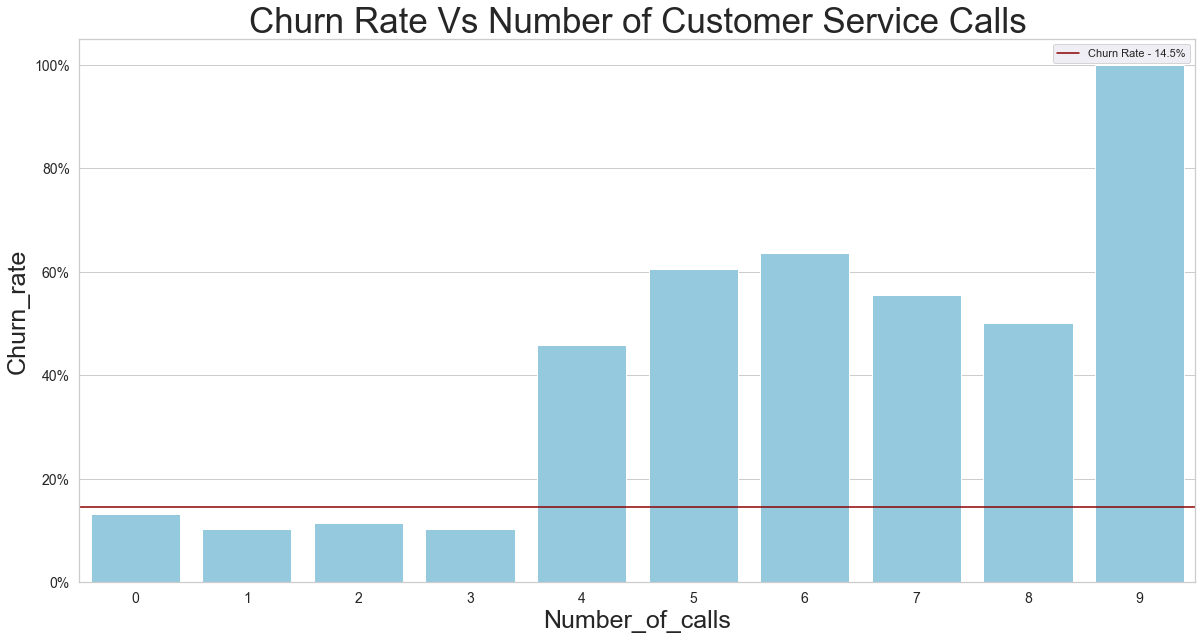

In [81]:
fig, ax = plt.subplots(figsize =(20, 10))
sns.set(style = 'darkgrid')
p = sns.barplot(x = 'Number_of_calls', y = 'Churn_rate', data = cs_churn, color = 'Skyblue')
p.set_xlabel("Number_of_calls", fontsize = 25)
p.set_ylabel("Churn_rate", fontsize = 25)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
line = plt.axhline(y = 0.145, color = 'Darkred')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
p.set_title("Churn Rate Vs Number of Customer Service Calls", fontsize = 35)

ax.legend([line], ['Churn Rate - 14.5%'])
plt.show()

In [82]:
# The chart above shows that customer who are unsatified with their service tend to call the customer service line
# more often... Customers who are more likely to churn tend to call at least 4 time or more.

In [83]:
intl_plan = df_cleaned3[['international_plan_yes', 'international_plan_no', 'churn']]
intl_churn = intl_plan.groupby('churn').sum().reset_index()
intl_churn = intl_churn.transpose()
intl_churn = intl_churn.rename(columns={0: "stayed", 1: "churned"})
intl_churn['total'] = intl_churn.apply(lambda x: x['stayed'] + x['churned'], axis = 1)
intl_churn['Churn_rate'] = intl_churn.apply(lambda x: x['churned'] / x['total'], axis=1)
intl_churn

,stayed,churned,total,Churn_rate
churn,0.0,1.0,1.0,1.000000
international_plan_yes,186.0,137.0,323.0,0.424149
international_plan_no,2664.0,346.0,3010.0,0.114950


In [84]:
intl_plan_analysis = df.copy()
intl_plan_analysis = intl_plan_analysis[['international_plan', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 
          'customer_service_calls', 'total_day_minutes', 'total_day_charge', 'churn']]

In [85]:
intl_plan_analysis.groupby('international_plan').mean()

,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_day_minutes,total_day_charge,churn
international_plan,,,,,,,
no,10.195349,4.465449,2.753279,1.573422,178.893887,30.412495,0.114950
yes,10.628173,4.609907,2.869907,1.464396,187.986997,31.958390,0.424149


In [86]:
# The table above shows the churn rate of customers with and without international plan.
# Churn rate of customers without international plan is about 11.5% compared to those who don't which is 42.5%.
# It also seems like customers with no international plan were able to make international calls which tells me
# that there's something wrong with the international plan. 

In [87]:
bill_charge = feat_analysis[['total_bill_charge', 'churn']]
bill_charge['charge_group'] = pd.qcut(feat_analysis['total_bill_charge'], 200)
group_counts = bill_charge.charge_group.value_counts().reset_index()
group_counts = group_counts.rename(columns={"index": "charge_group", "charge_group": "Number_of_accounts"})
bill_charge = bill_charge.groupby('charge_group').mean()
bill_charge = bill_charge.rename(columns = {'total_bill_charge': 'group_mean'})
bill_charge.head()

<ipython-input-87-bcbbc7c34e05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill_charge['charge_group'] = pd.qcut(feat_analysis['total_bill_charge'], 200)


,group_mean,churn
charge_group,,
"(22.929, 32.497]",28.372353,0.235294
"(32.497, 33.853]",33.329412,0.117647
"(33.853, 35.72]",34.832500,0.062500
"(35.72, 37.436]",36.645882,0.058824
"(37.436, 38.752]",38.102941,0.000000


In [88]:
bill_charge = bill_charge.reset_index()
bill_charge = bill_charge.merge(group_counts, on='charge_group')
bill_charge.head()

,charge_group,group_mean,churn,Number_of_accounts
0,"(22.929, 32.497]",28.372353,0.235294,17
1,"(32.497, 33.853]",33.329412,0.117647,17
2,"(33.853, 35.72]",34.832500,0.062500,16
3,"(35.72, 37.436]",36.645882,0.058824,17
4,"(37.436, 38.752]",38.102941,0.000000,17


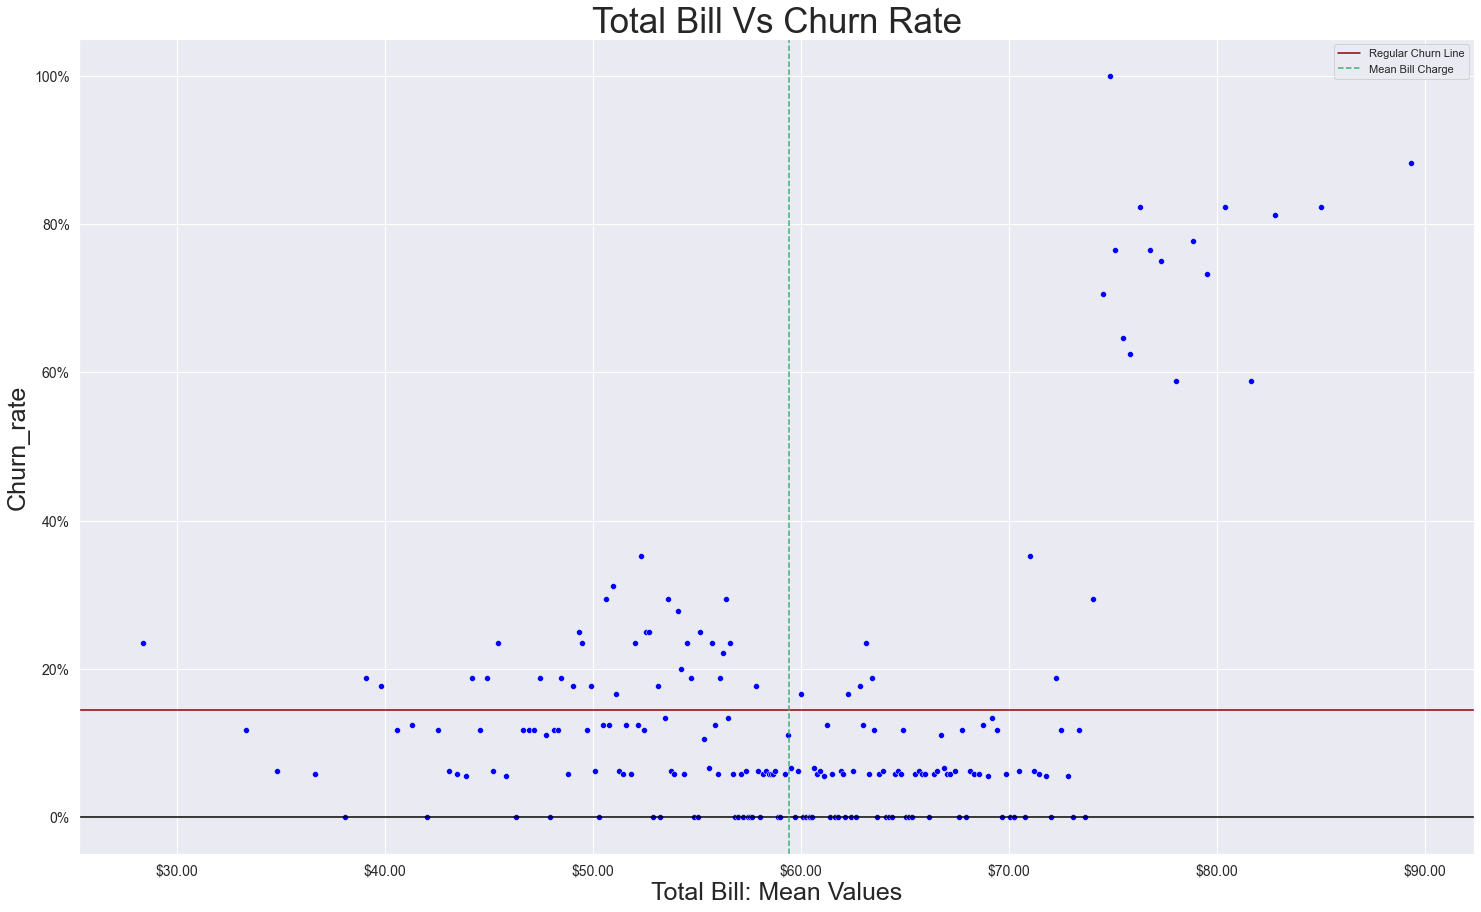

In [89]:
fig, ax = plt.subplots(figsize =(25, 15))
sns.set(style = 'darkgrid')
p = sns.scatterplot(x = 'group_mean', y = 'churn', data = bill_charge, color = 'blue')
p.set_xlabel("Total Bill: Mean Values", fontsize = 25)
p.set_ylabel("Churn_rate", fontsize = 25)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1, decimals = None, symbol = '%', is_latex = False))
ax.xaxis.set_major_formatter('${x:1.2f}')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
p.set_title("Total Bill Vs Churn Rate", fontsize = 35)

line_1 = plt.axhline(y =.145, color = 'Darkred')
line_2 = plt.axhline(y = 0, color = 'black')
line_3 = plt.axvline(x = 59.45, linestyle = '--', color ='mediumseagreen')

ax.legend([line_1, line_3], ['Regular Churn Line', 'Mean Bill Charge'])
plt.savefig('images/project_3_total_charge_churn')
plt.show()

In [90]:
# According to the chart above a charge of $74 or more per month leads to a high churn rate.

In [91]:
# Voicemail plan.

vm_churn = df_cleaned3[['voice_mail_plan_yes', 'voice_mail_plan_no', 'churn']]
vm_churn = vm_churn.groupby('churn').sum().reset_index()
vm_churn = vm_churn.transpose()
vm_churn = vm_churn.rename(columns={0: "stayed", 1: "churned"})
vm_churn['total'] = vm_churn.apply(lambda x: x['stayed'] + x['churned'], axis=1)
vm_churn['churn_rate'] = vm_churn.apply(lambda x: x['churned'] / x['total'], axis=1)
vm_churn[1:3]


,stayed,churned,total,churn_rate
voice_mail_plan_yes,842.0,80.0,922.0,0.086768
voice_mail_plan_no,2008.0,403.0,2411.0,0.167151


In [128]:
# The number have customers that do have voicemail plan have a higher churn rate compared to those who don't.

### Project Findings

In [129]:
# What is the attrition rate / churn rate that occured within the dataset provided?

# Churn rate is about 14.5%

In [131]:
# What factors contributes to the attrition rate or churn rate?

feature_importance_df[:4]

,Feature,Importance
13,cs_calls_high,0.432355
11,international_plan_yes,0.159342
10,total_bill_charge,0.118544
12,voice_mail_plan_yes,0.106361


In [ ]:
# The above features has a high rate of churn.

In [132]:
# Based on our analysis: - Customers who are at a high risk of churning are those who pay a total bill of about $74
# or more, also those who frequently calls customer service 4 or more times because their issues aren't resolved.
# And also customers who have international calls plan without voicemail plan. 